# Regressão Logística.

##

In [1]:
### Importar os pacotes a serem usados
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
%pylab inline

ModuleNotFoundError: No module named 'statsmodels'

In [4]:
df = pd.read_csv('breast-cancer.csv', 
                 header = None
                )

df.columns = ['ID', 
              'clump_Thickness', 
              'unif_cell_size', 
              'unif_cell_shape', 
              'adhesion', 
              'epith_cell_Size', 
              'bare_nuclei', 
              'bland_chromatin ',
              'norm_nucleoli', 
              'mitoses', 
              'class_t' 
             ]

df.sample(10)

,ID,clump_Thickness,unif_cell_size,unif_cell_shape,adhesion,epith_cell_Size,bare_nuclei,bland_chromatin,norm_nucleoli,mitoses,class_t
375,1116715,5,1,1,1,3,2,2,2,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
664,1369821,10,10,10,10,5,10,10,10,7,4
487,1253917,4,1,1,2,2,1,2,1,1,2
157,1197270,3,1,1,1,2,1,3,1,1,2
134,1182404,4,1,1,1,2,1,2,1,1,2
203,1219406,5,1,1,1,1,1,3,1,1,2
600,1041043,4,1,3,1,2,1,2,1,1,2
446,1268804,3,1,1,1,2,5,1,1,1,2
533,1240603,3,1,1,1,1,1,1,1,1,2


In [6]:
df.shape

(683, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ID                683 non-null    int64
 1   clump_Thickness   683 non-null    int64
 2   unif_cell_size    683 non-null    int64
 3   unif_cell_shape   683 non-null    int64
 4   adhesion          683 non-null    int64
 5   epith_cell_Size   683 non-null    int64
 6   bare_nuclei       683 non-null    int64
 7   bland_chromatin   683 non-null    int64
 8   norm_nucleoli     683 non-null    int64
 9   mitoses           683 non-null    int64
 10  class_t           683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


#### Subistituir valores de `2` e `4` para o atributo target `class_t` pelos valores `0` e `1`, respectivamente.

In [17]:
df['class_t'][df['class_t'] == 2] = 0
df['class_t'][df['class_t'] == 4] = 1

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ID                683 non-null    int64
 1   clump_Thickness   683 non-null    int64
 2   unif_cell_size    683 non-null    int64
 3   unif_cell_shape   683 non-null    int64
 4   adhesion          683 non-null    int64
 5   epith_cell_Size   683 non-null    int64
 6   bare_nuclei       683 non-null    int64
 7   bland_chromatin   683 non-null    int64
 8   norm_nucleoli     683 non-null    int64
 9   mitoses           683 non-null    int64
 10  class_t           683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


#### Dataset que coletado.

In [19]:
df.sample(10)

,ID,clump_Thickness,unif_cell_size,unif_cell_shape,adhesion,epith_cell_Size,bare_nuclei,bland_chromatin,norm_nucleoli,mitoses,class_t
598,1016634,2,3,1,1,2,1,2,1,1,0
226,1231706,8,4,6,3,3,1,4,3,1,0
568,1115762,3,1,1,1,2,1,1,1,1,0
679,841769,2,1,1,1,2,1,1,1,1,0
190,1213375,8,4,4,5,4,7,7,8,2,0
115,1173509,4,5,5,10,4,10,7,5,8,1
545,1321942,5,1,1,1,2,1,3,1,1,0
525,1158157,5,1,1,1,2,2,2,1,1,0
591,353098,4,1,1,2,2,1,1,1,1,0
576,1295529,2,5,7,6,4,10,7,6,1,1


## 2. Análise Exploratória dos Dados

In [20]:
df.iloc[:,1:len(df)].describe()

,clump_Thickness,unif_cell_size,unif_cell_shape,adhesion,epith_cell_Size,bare_nuclei,bland_chromatin,norm_nucleoli,mitoses,class_t
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,0.349927
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.477296
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


#### A correlação entre os dados que foram separados acima.

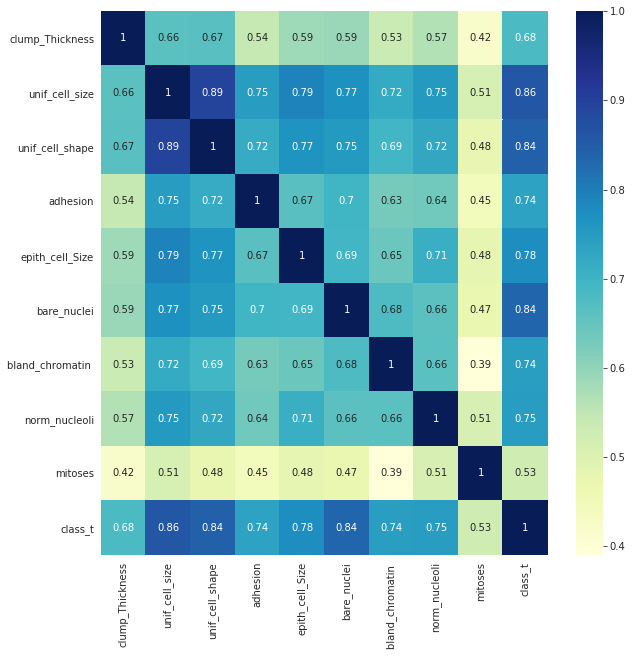

In [21]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize = (10, 10))
    ax = sns.heatmap(df.corr(method = 'spearman').iloc[1:len(df), 
                                                       1:len(df) ], 
            annot = True,
            cmap = "YlGnBu"
                    )

## 3. Ajustando um modelo de regressão logística

In [22]:
X = df.iloc[:, 1 : 9]
y = df['class_t']
print(X)
#print(y)

     clump_Thickness  unif_cell_size  unif_cell_shape  adhesion  \
0                  5               1                1         1   
1                  5               4                4         5   
2                  3               1                1         1   
3                  6               8                8         1   
4                  4               1                1         3   
..               ...             ...              ...       ...   
678                3               1                1         1   
679                2               1                1         1   
680                5              10               10         3   
681                4               8                6         4   
682                4               8                8         5   

     epith_cell_Size  bare_nuclei  bland_chromatin   norm_nucleoli  
0                  2            1                 3              1  
1                  7           10                 3      

### 3.1 Usando `scikit-learn`

#### O desempenho desse modelo tirando a média dos coeficientes de determinação dos valores da lista `kf_scores`.

In [25]:
np.mean(kf_scores)

0.9663469735720376

### 3.2 Usando `statsmodels`

In [26]:
X = sm.tools.add_constant(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

#### Regressão logística usando `statsmodels`.


In [28]:
logit = sm.Logit(y_train, X_train)

result = logit.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.082207
         Iterations 9
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.874      
Dependent Variable: class_t          AIC:              102.1801   
Date:               2021-02-01 10:43 BIC:              140.3251   
No. Observations:   512              Log-Likelihood:   -42.090    
Df Model:           8                LL-Null:          -334.37    
Df Residuals:       503              LLR p-value:      4.8984e-121
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     9.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
------------------------------------------------------------------
const             -9.6191   1.2851 -7.4853 0.0000 -12.1378 -7.1005
clump_Thickness    0.5723   0.1599  3.5785 0.0003   0

#### Matriz de confusão do modelo com os dados preditos e observados.

In [29]:
from sklearn.metrics import confusion_matrix

y_pred = result.predict(X_test) > 0.5
print(y_pred)

confusion_matrix(y_test, y_pred)

584    False
434     True
606    False
275     True
572    False
       ...  
458    False
134    False
390    False
297    False
524    False
Length: 171, dtype: bool


array([[115,   1],
       [  4,  51]])

#### Acurácia do modelo 

In [30]:
np.sum(y_test == y_pred) / len(y_test)

0.9707602339181286

### 3.2 Usando (novamente) `sklearn`

#### Treino e teste `X_train` e `X_test`, criada anteriormente como interceptor. 

In [31]:
X_test = X_test.drop('const', axis = 1)
X_train = X_train.drop('const', axis = 1)

In [32]:
reglogsklearn = LogisticRegression(fit_intercept = True, 
                                   penalty = 'l2', 
                                   C = 1e10)

reglogsklearn.fit(X_train, y_train)

LogisticRegression(C=10000000000.0)

#### Os valores dos coeficientes linear `.intercept_` e angulares `.coef_`.

In [33]:
reglogsklearn.intercept_, reglogsklearn.coef_

(array([-9.61914978]),
 array([[ 0.57225466, -0.03431069,  0.45128636,  0.32984029,  0.05889074,
          0.31394551,  0.37745707,  0.26897013]]))

#### Previsão `y_pred2` do targets com a função [`.predict()`] aplicada aos dados de treino `X_test`. 

#### A acurácia do modelo com a função [`accuracy_score()`] aplicada aos subconjuntos `y_test` e `y_pred2`

In [34]:
y_pred2 = reglogsklearn.predict(X_test)
accuracy_score(y_test, y_pred2)

0.9707602339181286

#### A matriz de confusão entre `y_test` e `y_pred2` :

In [35]:
confusion_matrix(y_test, y_pred2)

array([[115,   1],
       [  4,  51]])

#### Comparando os valores de target previstos `y_pred` com os valores do subconjunto de teste `y_test`, através da soma das comparações que retornam `True`, dividido pelo comprimento do subconjunto de teste.

In [36]:
np.sum(y_test == y_pred2) / len(y_test)

0.9707602339181286

## 4. Análise e interpretação

* O que podem dizer sobre este modelo?
* Como o ajuste dele funciona?
* Quais são as principais variáveis preditoras do tipo de tumor?

## 5. Comparação com KNN

#### Com o mesmo split entre `train` e `test` gerado anteriormente, usar o conjunto de traino para estimar um modelo de [`kNN`](https://towardsdatascience.com/k-nearest-neighbors-knn-explained-cbc31849a7e3) com hiperparâmetros ideais e comparar o desempenho em dados não observados com respeito à regressão logística.

#### Importar as bibliotecas:

In [37]:
from sklearn.model_selection import KFold
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

#### Definir uma função própria que receba como argumentos os subconjuntos de atributos descritivos `X` e targets , `y`, faça uma varredura  em `loop` sobre um intervalo ( `start`, `stop`, `step` ) de valores de k-vizinhos.

#### A função deverá ainda conter uma instancia de um objeto `model` para receber um modelo de calssificação do tipo [`kNN`](https://portaldatascience.com/o-algoritmo-k-nearest-neighbors-knn-em-machine-learning/), um objeto `kf` que defina os parâmetros para a estratégia para a validação cruzada e um objeto `cv_scores` para receber os dados do modelo, conjuntos de atributos descritivos `X` e target `y`, juntamente com a estratégia de VC e que calcule o coeficiente de determinação para cada valor `k` de vizinhos definidos.

#### A função deverá ainda conter um dicionário com os valores médios  e o desvio padrão dos coeficientes de determinação  de todas as dobras realizadas pela validação cruzada. 

#### Ao fim da função o dicionário de valores oara `cv_scores` deve ser convertido em um dataframe e um margem de $\pm$ um desvio padrão de `cv_scores` deve ser criada para visualização gráfica.

In [38]:
def scores_knn(X, y, start, stop, step):
    
    # Quero representar graficamente os diferentes valores do score de cross validation em função do hiperparâmetro n_neighbors
    # Para isso, vou gerar uma lista de dicionários que depois pode ser facilmente convertida a DataFrame
    # Lista de Dicionários
    
    scores_para_df = []
    
    # range(1,40,5) são os valores possíveis de n_neighbors que quero explorar. São todos os inteiros a partir de 1
    # até 40, de 5 em 5. (Start,Stop,Step)
    
    for i in range(start, stop, step):
        # Em cada iteração, instanciamos o modelo com um hiperparâmetro diferente
        
        model = KNeighborsClassifier(n_neighbors = i)

# cross_val_scores retorna um array de 5 resultados, um para cada partição feita automaticamente pelo CV        
        kf = KFold(n_splits = 10, 
                   shuffle = True
                  )
        
        cv_scores = cross_val_score(model, 
                                    X, 
                                    y, 
                                    cv = kf
                                   )

        # Para cada valor de n_neighbours, crio um dicionário com o valor de n_neighbours, a média e o desvio dos scores.
        
        dict_row_score = {'score_medio' : np.mean(cv_scores),
                          'score_std' : np.std(cv_scores),
                          'n_neighbours' : i
                         }

        # Guardo cada um na lista de dicionários
        
        scores_para_df.append(dict_row_score)
        
        df_scores = pd.DataFrame(scores_para_df)
        df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
        df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']

    return df_scores


#### Com a biblioteca de pré-processamento [`sklearn.preprocessing`] fazer o reescalonamento dos dados de treino com a função [`preprocessing.scale()`] e então aplicar a função para os parâmetros:

* `(X = X_train_std, y = y_train, start = 1, stop = 20, step = 1)`.

In [39]:
from sklearn import preprocessing

X_train_std = preprocessing.scale(X_train, 
                                  axis = 0
                                 )
df_scores = scores_knn(X = X_train_std, 
                       y = y_train, 
                       start = 1, 
                       stop = 20, 
                       step = 1
                      )
df_scores

,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
0,0.949133,0.031833,1,0.917300,0.980966
1,0.931787,0.036785,2,0.895002,0.968573
2,0.963047,0.029056,3,0.933991,0.992102
3,0.947360,0.021149,4,0.926212,0.968509
4,0.961011,0.028883,5,0.932127,0.989894
5,0.960935,0.026253,6,0.934682,0.987188
6,0.960973,0.019498,7,0.941475,0.980471
7,0.960860,0.029134,8,0.931725,0.989994
8,0.962896,0.026893,9,0.936003,0.989789
9,0.962821,0.029668,10,0.933153,0.992488


#### Plotar um gráfico com os valores médios dos coeficientes de determinação e também as margens de um desvio padrão que foi calculado.

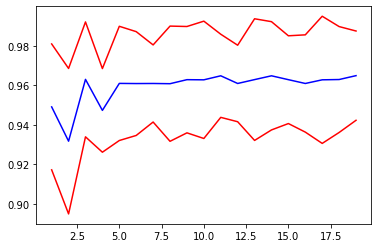

In [40]:
plt.plot(df_scores['n_neighbours'], 
         df_scores['limite_inferior'], 
         color = 'r'
        )
plt.plot(df_scores['n_neighbours'], 
         df_scores['score_medio'], 
         color = 'b'
        )
plt.plot(df_scores['n_neighbours'], 
         df_scores['limite_superior'], 
         color = 'r'
        );

#### Importar a biblioteca [`sklearn.preprocessing.StandardScaler`] para padronizar os atributos centralizarlos em suas médias e medí-los em termos de seu desvio padrão.

#### Depois da padronização é só ajustá com a função [`.fit_transform()`], que ajusta os dados e retorna uma versão transformada dos mesmos.

In [41]:
# O número ideal de vizinhos é 3

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

#print(X_train_std[:,1])
#print(X_train_std)

#### Uma vez padronizados os atributos do conjunto de dados de treino `X_train`, vamos aplicar a função [`.std()`](https://numpy.org/doc/1.18/reference/generated/numpy.std.html) a este subconjunto para calcular o desvio padrão ao longo do eixo especificado.

In [42]:
np.std(X_train_std[:,1])

1.0

#### Instanciar um novo objeto `model` para receber o modelo de classificação [`kNN`], agora com um número de vizinhos definido como `n_neighbors = 3`, para isso é usado a função [`KNeighborsClassifier`].

In [135]:
model = KNeighborsClassifier(n_neighbors = 3)

#### O modelo, com os subconjuntos de treino `X_train_std`, padronizado e `y_train`, deve se então ajustado.

In [136]:
model.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=3)

#### Padronizar e transformar também o subconjunto de teste `X_test` e aplicando novamente a função [`.fit_transform()`], que ajusta os dados e retorna uma versão transformada dos mesmos.

In [137]:
X_test_std = scaler.transform(X_test)

#### Refazer previsões com a função [`.predict()`] aplicada ao subconjunto padronizado de teste  `X_test_std` para validar o modelo.

In [138]:
y_pred = model.predict(X_test_std)

#### Aqui é medido a acurácia do modelo com a função [`accuracy_score()`] aplicada aos subconjuntos `y_test` e `y_pred`.

In [139]:
accuracy_score(y_test, y_pred)

0.9766081871345029